In [2821]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

Загружаем данные, удаляем колонки и заменяем "-1" на NaN

In [2822]:
df = pd.read_csv('parsed.csv')
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6.0,6.0,1.0,20.7,...,-1,18 м²,1 м²,7.917510e+10,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1.0,9.0,1.0,33.0,...,-1,18 м²,6 м²,7.964553e+10,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4.0,4.0,1.0,14.0,...,-1,-1,-1,7.980713e+10,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5.0,5.0,1.0,17.5,...,-1,-1,-1,7.964565e+10,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4.0,7.0,1.0,25.9,...,-1,20 м²,5 м²,7.909941e+10,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2.0,3.0,1.0,46.7,...,-1,25 м²,6 м²,7.964782e+10,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3.0,5.0,1.0,29.0,...,-1,25 м²,-1,7.964566e+10,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3.0,6.0,1.0,19.1,...,-1,-1,-1,7.964782e+10,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1.0,2.0,1.0,27.1,...,-1,18 м²,6 м²,7.967134e+10,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6.0,9.0,2.0,42.7,...,-1,"29,7 м²","5,6 м²",7.915051e+10,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [2823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                7591 non-null   object 
 1   author_type           7594 non-null   object 
 2   url                   7905 non-null   object 
 3   location              7905 non-null   object 
 4   deal_type             7905 non-null   object 
 5   accommodation_type    7905 non-null   object 
 6   floor                 7905 non-null   float64
 7   floors_count          7905 non-null   float64
 8   rooms_count           7905 non-null   float64
 9   total_meters          7905 non-null   float64
 10  price                 7892 non-null   float64
 11  year_of_construction  7905 non-null   object 
 12  object_type           7905 non-null   object 
 13  have_loggia           7905 non-null   object 
 14  parking_type          7905 non-null   object 
 15  house_material_type  

In [2824]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'heating_type', 'have_loggia', 'house_material_type', 'finish_type', 'residential_complex', 'district'], inplace=True)
df = df.drop_duplicates()
df_clean = df.dropna(thresh=3)  

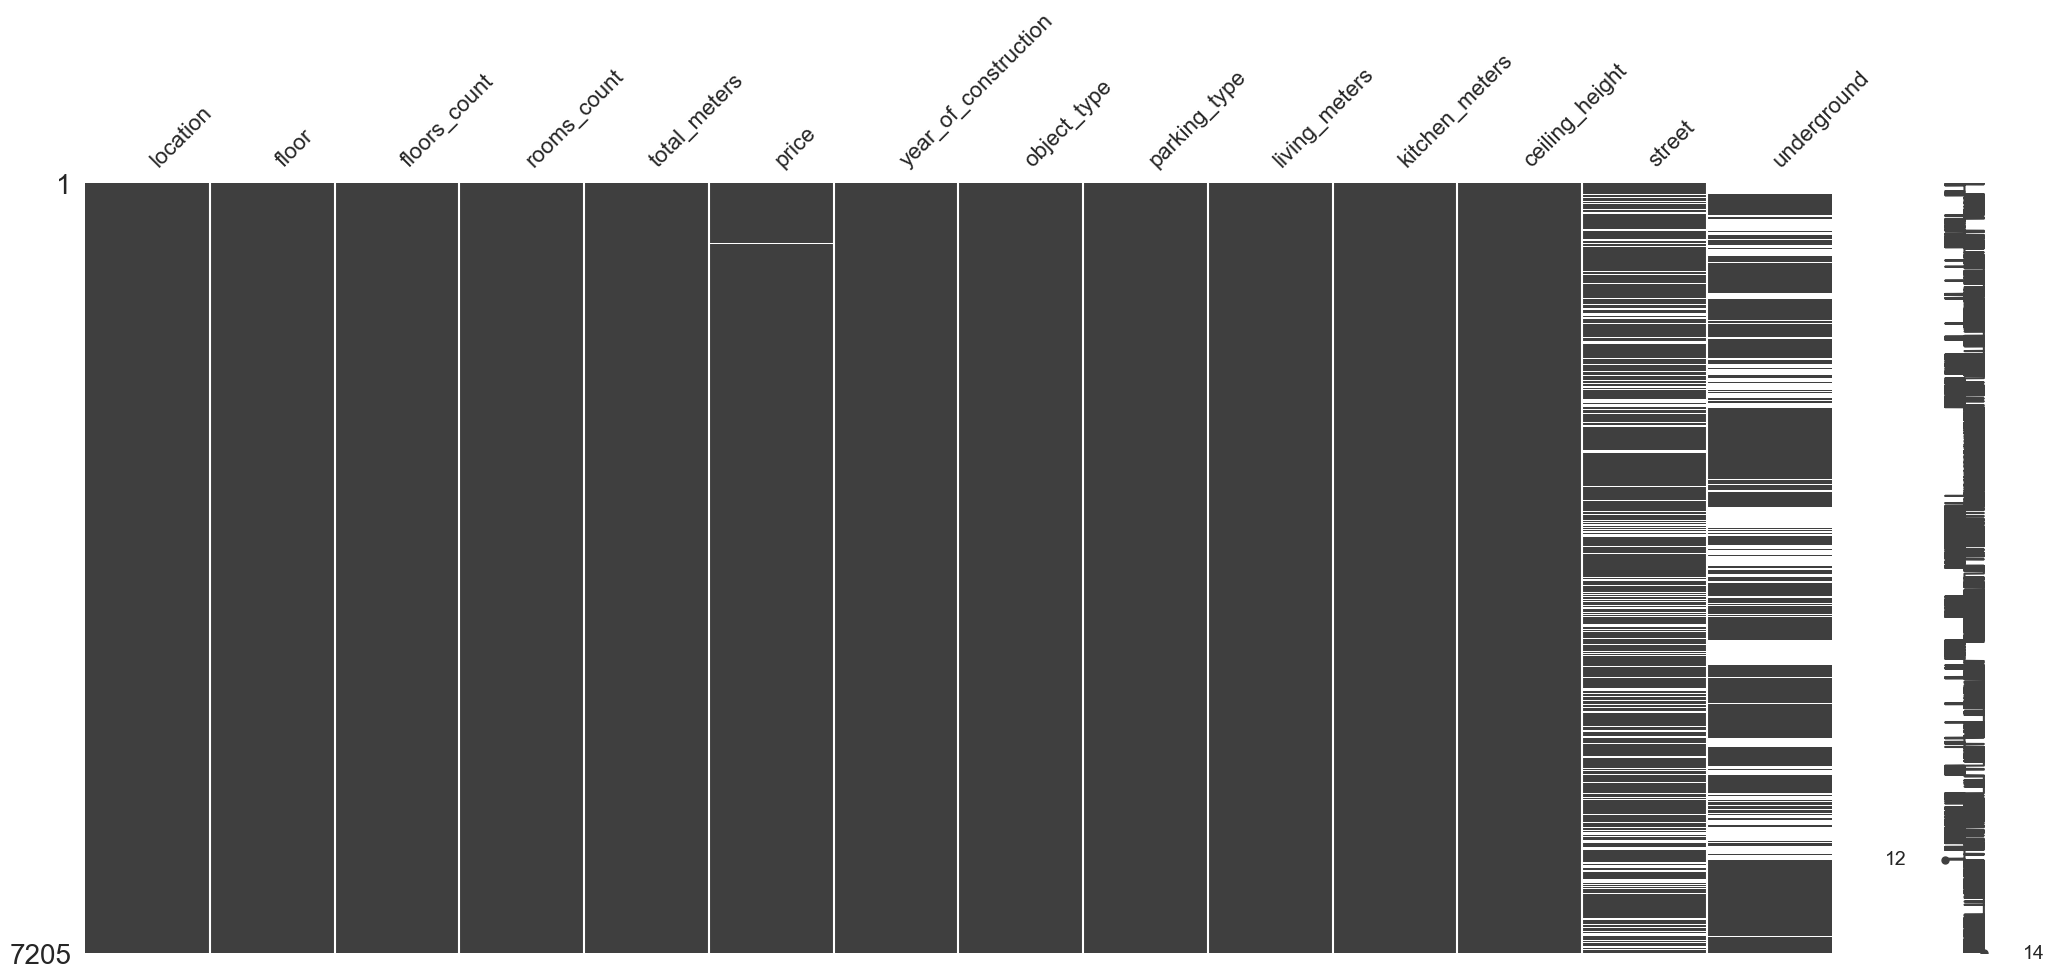

<Figure size 1000x500 with 0 Axes>

In [2825]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2826]:
check_null = df_clean.isnull().sum()
print(check_null)

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                     13
year_of_construction       0
object_type                0
parking_type               0
living_meters              0
kitchen_meters             0
ceiling_height             0
street                  1491
underground             2203
dtype: int64


In [2827]:
df_clean.replace('-1', np.nan, inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\836098550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace('-1', np.nan, inplace=True)


In [2828]:
# for column in df_clean.columns:
#     df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

In [2829]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6.0,6.0,1.0,20.70,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1.0,9.0,1.0,33.00,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4.0,4.0,1.0,14.00,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5.0,5.0,1.0,17.50,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4.0,7.0,1.0,25.90,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2.0,3.0,1.0,46.70,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3.0,5.0,1.0,29.00,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3.0,6.0,1.0,19.10,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1.0,2.0,1.0,27.10,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6.0,9.0,2.0,42.70,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


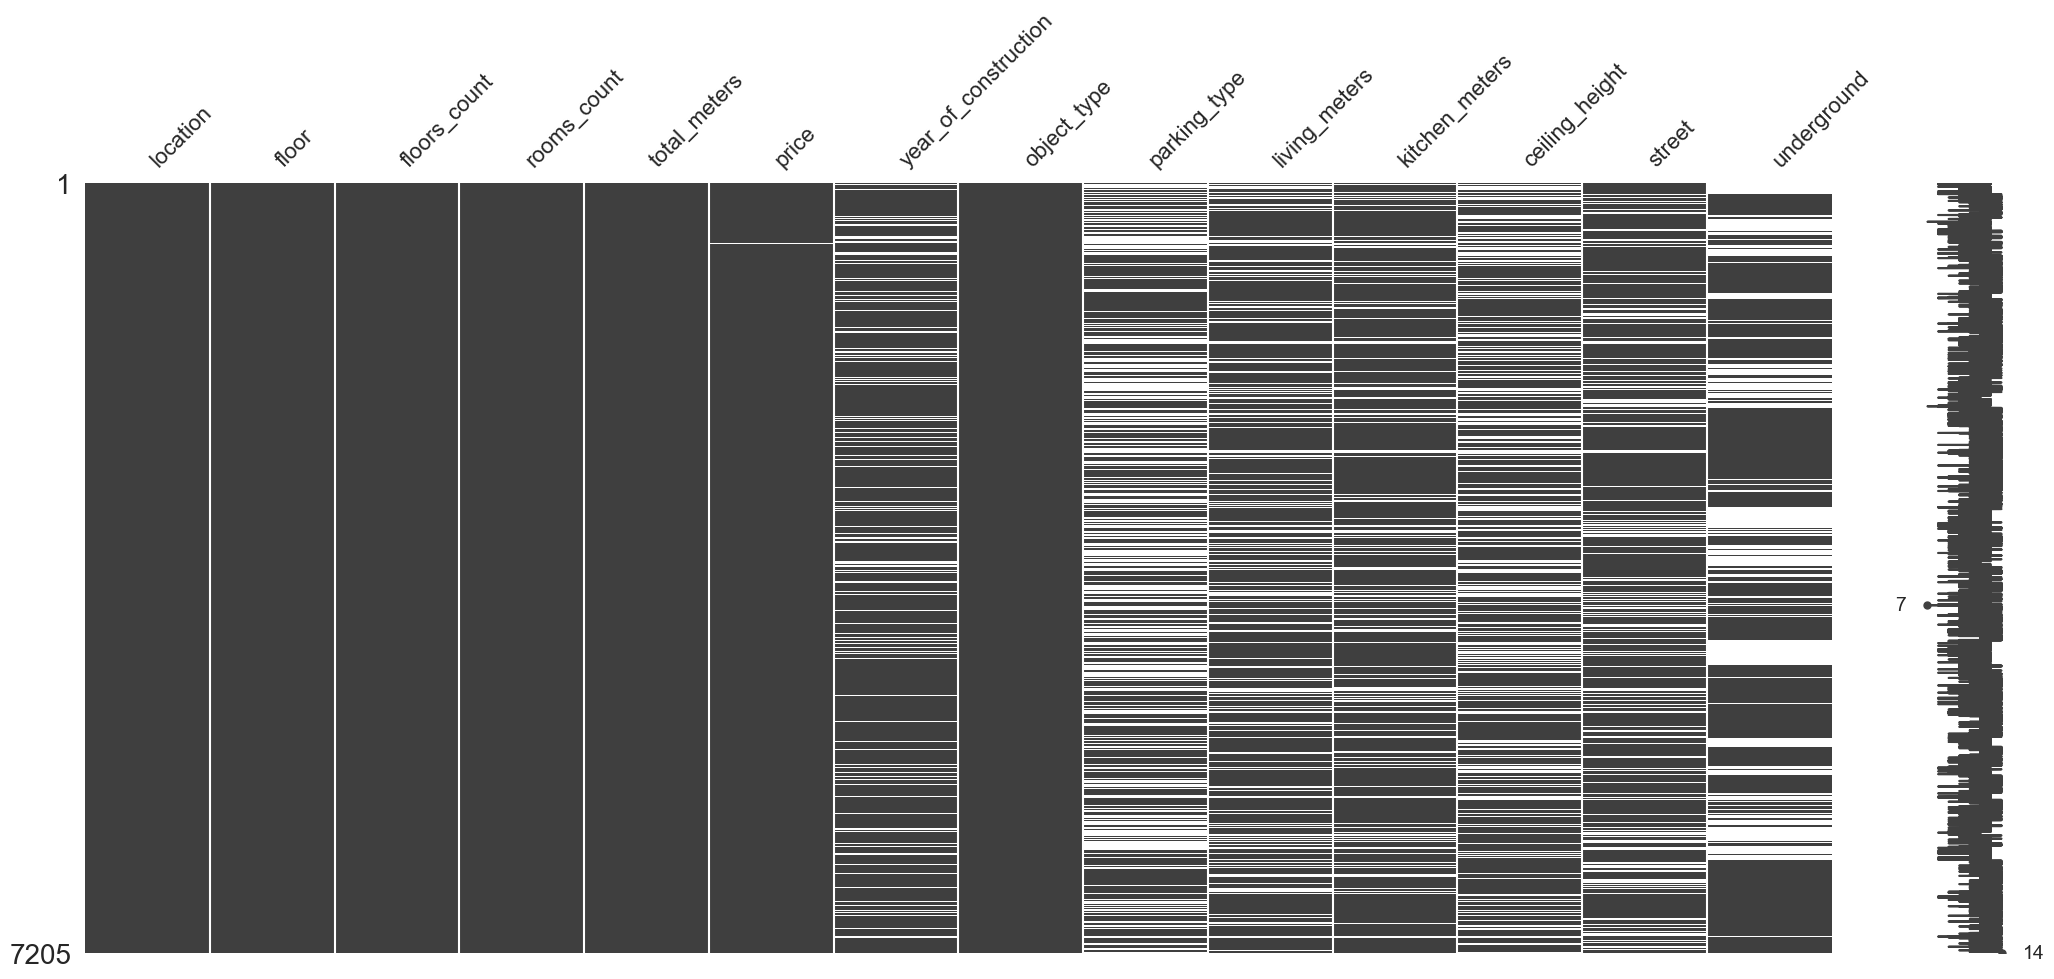

<Figure size 1000x500 with 0 Axes>

In [2830]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

Узнаём сколько пустых значений

In [2831]:
check_null = df_clean.isnull().sum()
print(check_null)

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                     13
year_of_construction    1249
object_type                0
parking_type            3168
living_meters           1605
kitchen_meters          1201
ceiling_height          2531
street                  1491
underground             2203
dtype: int64


In [2832]:
df_clean['floor'].describe()

count    7205.000000
mean        7.383206
std         6.655071
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        82.000000
Name: floor, dtype: float64

In [2833]:
df_clean['floor'].unique()

array([ 6.,  1.,  4.,  5.,  2.,  3., 15.,  8.,  7.,  9., 18., 13., 10.,
       11., 35., 22., 12., 20., 14., 19., 37., 24., 28., 17., 34., 16.,
       40., 21., 41., 30., 33., 29., 23., 25., 26., 75., 62., 31., 46.,
       48., 80., 53., 38., 27., 57., 59., 32., 36., 47., 82., 39., 79.,
       66., 60., 51.])

In [2834]:
df_clean['floor'] = df_clean['floor'].replace('floor', '3')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\1059912286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].replace('floor', '3')


In [2835]:

df_clean['floor'] = df_clean['floor'].astype('int64')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\3602364599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].astype('int64')


In [2836]:
df_clean['floor'].unique()

array([ 6,  1,  4,  5,  2,  3, 15,  8,  7,  9, 18, 13, 10, 11, 35, 22, 12,
       20, 14, 19, 37, 24, 28, 17, 34, 16, 40, 21, 41, 30, 33, 29, 23, 25,
       26, 75, 62, 31, 46, 48, 80, 53, 38, 27, 57, 59, 32, 36, 47, 82, 39,
       79, 66, 60, 51])

In [2837]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7205 non-null   object 
 1   floor                 7205 non-null   int64  
 2   floors_count          7205 non-null   float64
 3   rooms_count           7205 non-null   float64
 4   total_meters          7205 non-null   float64
 5   price                 7192 non-null   float64
 6   year_of_construction  5956 non-null   object 
 7   object_type           7205 non-null   object 
 8   parking_type          4037 non-null   object 
 9   living_meters         5600 non-null   object 
 10  kitchen_meters        6004 non-null   object 
 11  ceiling_height        4674 non-null   object 
 12  street                5714 non-null   object 
 13  underground           5002 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 844.3+ KB


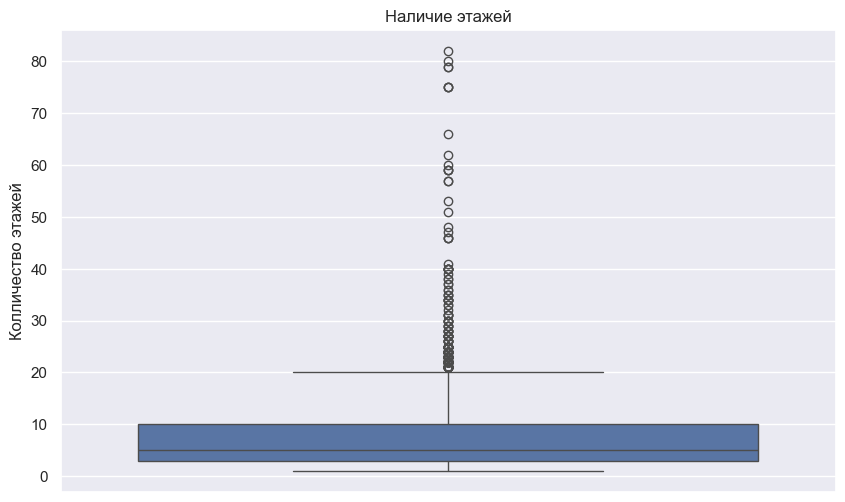

In [2838]:
# Создание boxplot для цен по годам
plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df_clean)

# Настройка графика
plt.title("Наличие этажей")
plt.ylabel("Колличество этажей")
plt.show()

In [2839]:
Q1 = df_clean['floor'].quantile(0.25)
Q3 = df_clean['floor'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['floor'] >= lower_bound) & (df_clean['floor'] <= upper_bound)]

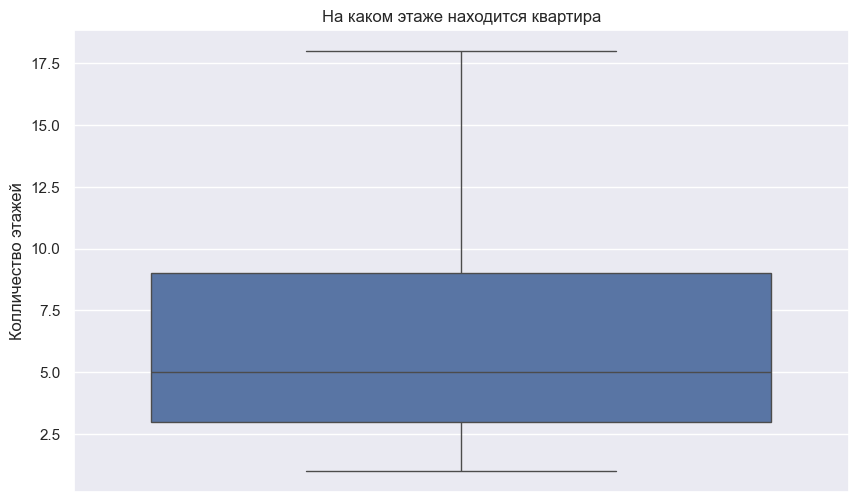

In [2840]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df_clean)

# Настройка графика
plt.title("На каком этаже находится квартира")
plt.ylabel("Колличество этажей")
plt.show()

In [2841]:
df_clean['floors_count'].unique()

array([ 6.,  9.,  4.,  5.,  7.,  3.,  2., 17., 10., 24.,  1., 14., 18.,
       12., 23., 20., 21., 43.,  8., 59., 40., 27., 41., 15., 13., 16.,
       29., 25., 49., 30., 39., 35., 26., 34., 19., 11., 22., 36., 68.,
       38., 78., 64., 28., 45., 37., 31., 32., 52., 46., 44., 67., 50.,
       48., 33., 51., 53., 56., 47.])

In [2842]:
df_clean['floors_count'].unique()

df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))

df_clean['floors_count'] = df_clean['floors_count'].astype(float)

mean_value = df_clean['floors_count'].mean()

df_clean['floors_count'] = df_clean['floors_count'].fillna(mean_value)

df_clean['floors_count'] = df_clean['floors_count'].astype('int64')

df_clean['floors_count'].unique()


array([ 6,  9,  4,  5,  7,  3,  2, 17, 10, 24,  1, 14, 18, 12, 23, 20, 21,
       43,  8, 59, 40, 27, 41, 15, 13, 16, 29, 25, 49, 30, 39, 35, 26, 34,
       19, 11, 22, 36, 68, 38, 78, 64, 28, 45, 37, 31, 32, 52, 46, 44, 67,
       50, 48, 33, 51, 53, 56, 47])

In [2843]:
df_clean.head(10)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1.0,20.7,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1,9,1.0,33.0,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4,4,1.0,14.0,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5,5,1.0,17.5,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4,7,1.0,25.9,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2,3,1.0,46.7,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3,5,1.0,29.0,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3,6,1.0,19.1,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1,2,1.0,27.1,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6,9,2.0,42.7,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


In [2844]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6801 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6801 non-null   object 
 1   floor                 6801 non-null   int64  
 2   floors_count          6801 non-null   int64  
 3   rooms_count           6801 non-null   float64
 4   total_meters          6801 non-null   float64
 5   price                 6788 non-null   float64
 6   year_of_construction  5590 non-null   object 
 7   object_type           6801 non-null   object 
 8   parking_type          3798 non-null   object 
 9   living_meters         5281 non-null   object 
 10  kitchen_meters        5695 non-null   object 
 11  ceiling_height        4350 non-null   object 
 12  street                5424 non-null   object 
 13  underground           4633 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 797.0+ KB


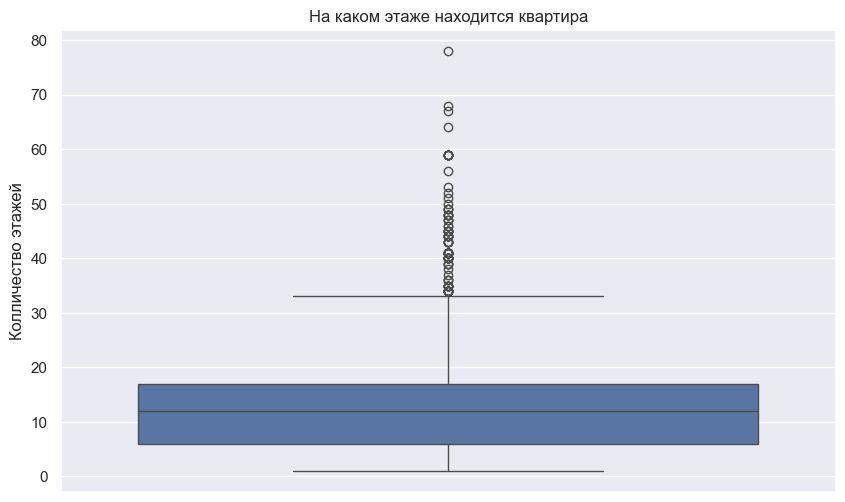

In [2845]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df_clean)

# Настройка графика
plt.title("На каком этаже находится квартира")
plt.ylabel("Колличество этажей")
plt.show()

In [2846]:
Q1 = df_clean['floors_count'].quantile(0.25)
Q3 = df_clean['floors_count'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['floors_count'] >= lower_bound) & (df_clean['floors_count'] <= upper_bound)]

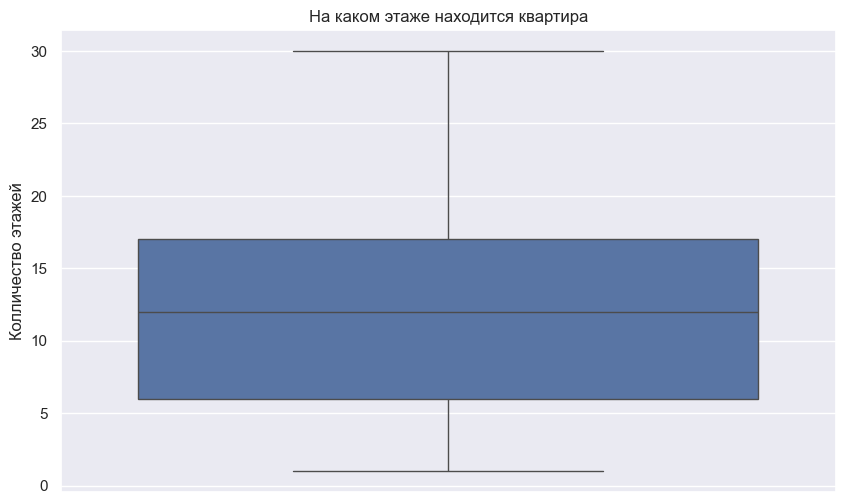

In [2847]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df_clean)

# Настройка графика
plt.title("На каком этаже находится квартира")
plt.ylabel("Колличество этажей")
plt.show()

In [2848]:
df_clean['rooms_count'].unique()

df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype('int64')

df_clean['rooms_count'].unique()



array([1, 2, 3, 4, 5])

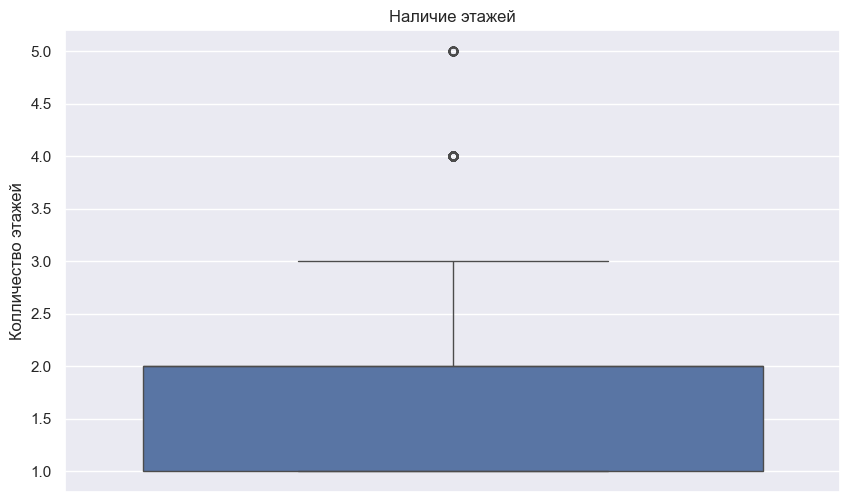

In [2849]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df_clean)

# Настройка графика
plt.title("Наличие этажей")
plt.ylabel("Колличество этажей")
plt.show()

In [2850]:
Q1 = df_clean['rooms_count'].quantile(0.25)
Q3 = df_clean['rooms_count'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['rooms_count'] >= lower_bound) & (df_clean['rooms_count'] <= upper_bound)]

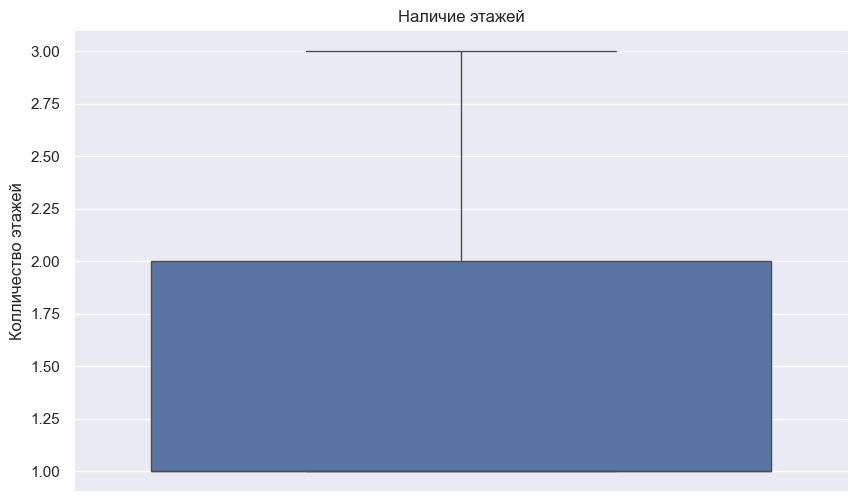

In [2851]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df_clean)

# Настройка графика
plt.title("Наличие этажей")
plt.ylabel("Колличество этажей")
plt.show()

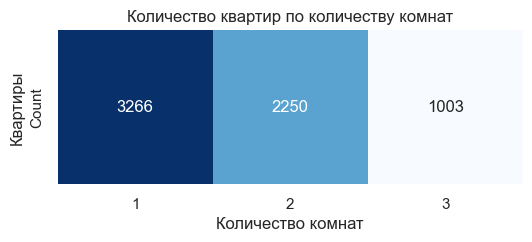

In [2852]:
# Подсчёт количества квартир по каждой категории комнат
room_counts = df_clean['rooms_count'].value_counts().sort_index()

# Преобразование в DataFrame для наглядности таблицы
room_counts_df = room_counts.reset_index()
room_counts_df.columns = ['Rooms', 'Count']

# Создание графика
plt.figure(figsize=(6, 2))
sns.heatmap(room_counts_df.set_index('Rooms').T, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title("Количество квартир по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Квартиры")

plt.show()

In [2853]:
df_clean.head(10)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4,4,1,14.0,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2,3,1,46.7,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3,5,1,29.0,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3,6,1,19.1,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1,2,1,27.1,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6,9,2,42.7,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


In [2854]:
# if (df_clean['total_meters'] == -1).any():
#     print('У вас есть -1')
# else:
#     print('У вас нет -1')


In [2855]:
# if (df_clean['total_meters'] == str).any():
#     print('У вас есть str')
# else:
#     print('У вас нет str')


In [2856]:
# df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


In [2857]:
df_clean['total_meters'].unique()

array([20.7 , 33.  , 14.  , ..., 30.47, 36.79, 48.39])

In [2858]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6519 non-null   object 
 1   floor                 6519 non-null   int64  
 2   floors_count          6519 non-null   int64  
 3   rooms_count           6519 non-null   int64  
 4   total_meters          6519 non-null   float64
 5   price                 6515 non-null   float64
 6   year_of_construction  5353 non-null   object 
 7   object_type           6519 non-null   object 
 8   parking_type          3640 non-null   object 
 9   living_meters         5070 non-null   object 
 10  kitchen_meters        5488 non-null   object 
 11  ceiling_height        4146 non-null   object 
 12  street                5206 non-null   object 
 13  underground           4362 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 763.9+ KB


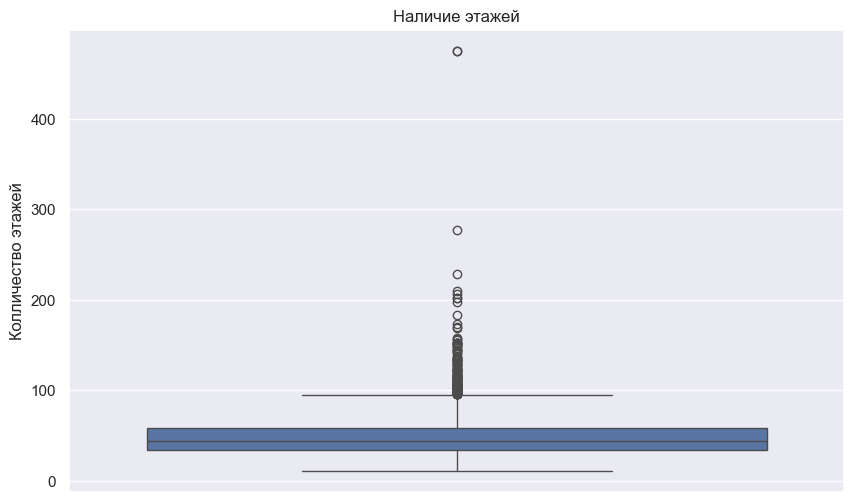

In [2859]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df_clean)

# Настройка графика
plt.title("Наличие этажей")
plt.ylabel("Колличество этажей")
plt.show()

In [2860]:
Q1 = df_clean['total_meters'].quantile(0.25)
Q3 = df_clean['total_meters'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['total_meters'] >= lower_bound) & (df_clean['total_meters'] <= upper_bound)]

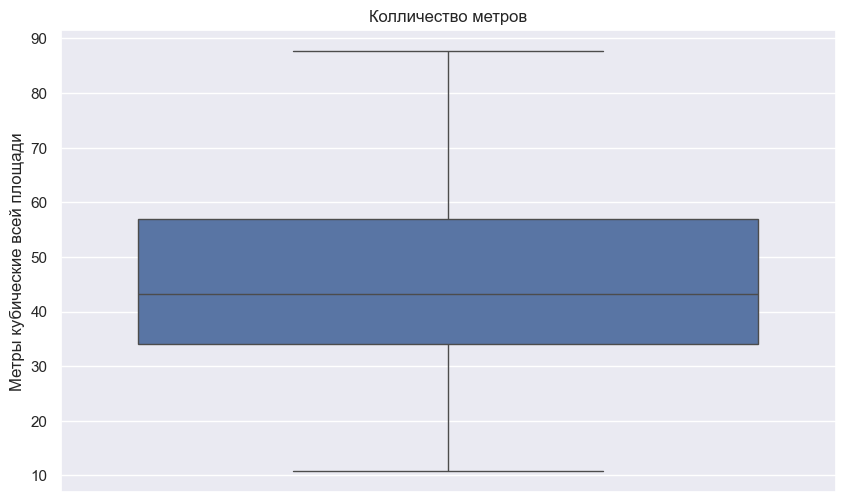

In [2861]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df_clean)

# Настройка графика
plt.title("Колличество метров")
plt.ylabel("Метры кубические всей площади")
plt.show()

In [2862]:
check_null = df_clean.isnull().sum()
print(check_null)

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                      3
year_of_construction    1100
object_type                0
parking_type            2783
living_meters           1379
kitchen_meters          1002
ceiling_height          2275
street                  1290
underground             2125
dtype: int64


In [2863]:
check_null_price = df_clean.loc[df_clean['price'].isna()]
check_null_price

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
499,Одинцово,2,24,1,36.30,NaN,2025,Новостройка,Подземная,"21,8 м²",NaN,"2,8 м",NaN,Одинцово
1040,Москва,14,21,1,38.93,NaN,2026,Новостройка,Подземная,NaN,NaN,"2,85 м",Северный ао,Селигерская
1103,Москва,11,21,3,74.50,NaN,2020,Новостройка / Апартаменты,NaN,"46,9 м²","7,8 м²","3,3 м",Аминьевское шоссе,Давыдково


In [2864]:
df_clean.drop(499, inplace=True)
df_clean.drop(1040, inplace=True)
df_clean.drop(1103, inplace=True)

In [2865]:
check_null_price = df_clean.loc[df_clean['price'].isna()]
check_null_price

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground


In [2866]:
df_clean['price'] = df_clean['price'].astype('int64')

df_clean['price'].unique()


array([ 2350000,  4150000,  1700000, ..., 11141910, 15304246, 13014356])

In [2867]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6292 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6292 non-null   object 
 1   floor                 6292 non-null   int64  
 2   floors_count          6292 non-null   int64  
 3   rooms_count           6292 non-null   int64  
 4   total_meters          6292 non-null   float64
 5   price                 6292 non-null   int64  
 6   year_of_construction  5192 non-null   object 
 7   object_type           6292 non-null   object 
 8   parking_type          3510 non-null   object 
 9   living_meters         4914 non-null   object 
 10  kitchen_meters        5292 non-null   object 
 11  ceiling_height        4017 non-null   object 
 12  street                5003 non-null   object 
 13  underground           4167 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 737.3+ KB


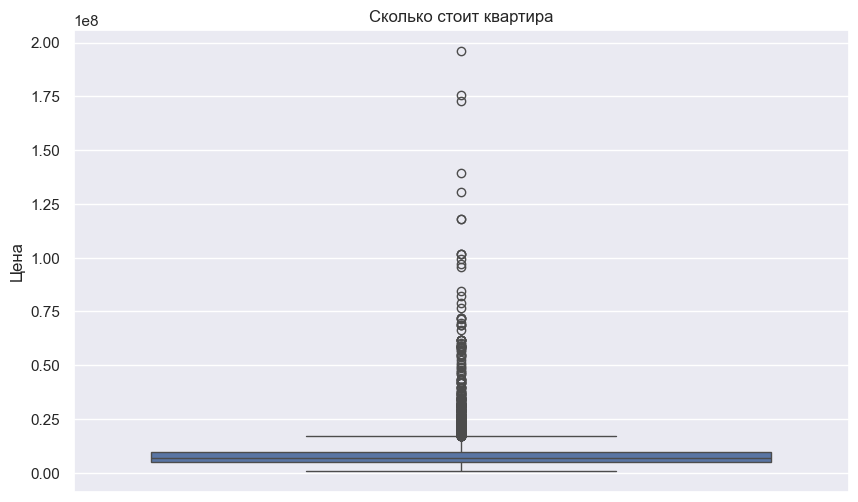

In [2868]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df_clean)

# Настройка графика
plt.title("Сколько стоит квартира")
plt.ylabel("Цена")
plt.show()

In [2869]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

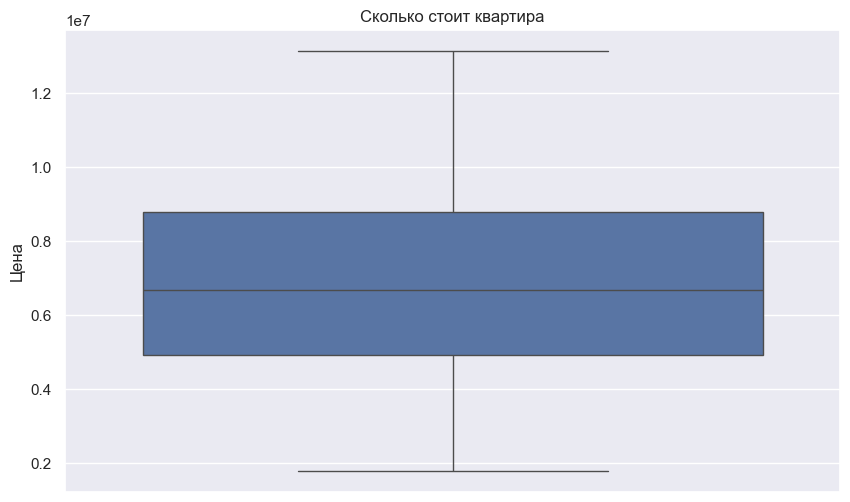

In [2870]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df_clean)

# Настройка графика
plt.title("Сколько стоит квартира")
plt.ylabel("Цена")
plt.show()

In [2871]:
duplicates = df_clean.duplicated().sum()
print("Количество дубликатов в DataFrame:", duplicates)
df_clean = df_clean.drop_duplicates()


Количество дубликатов в DataFrame: 0


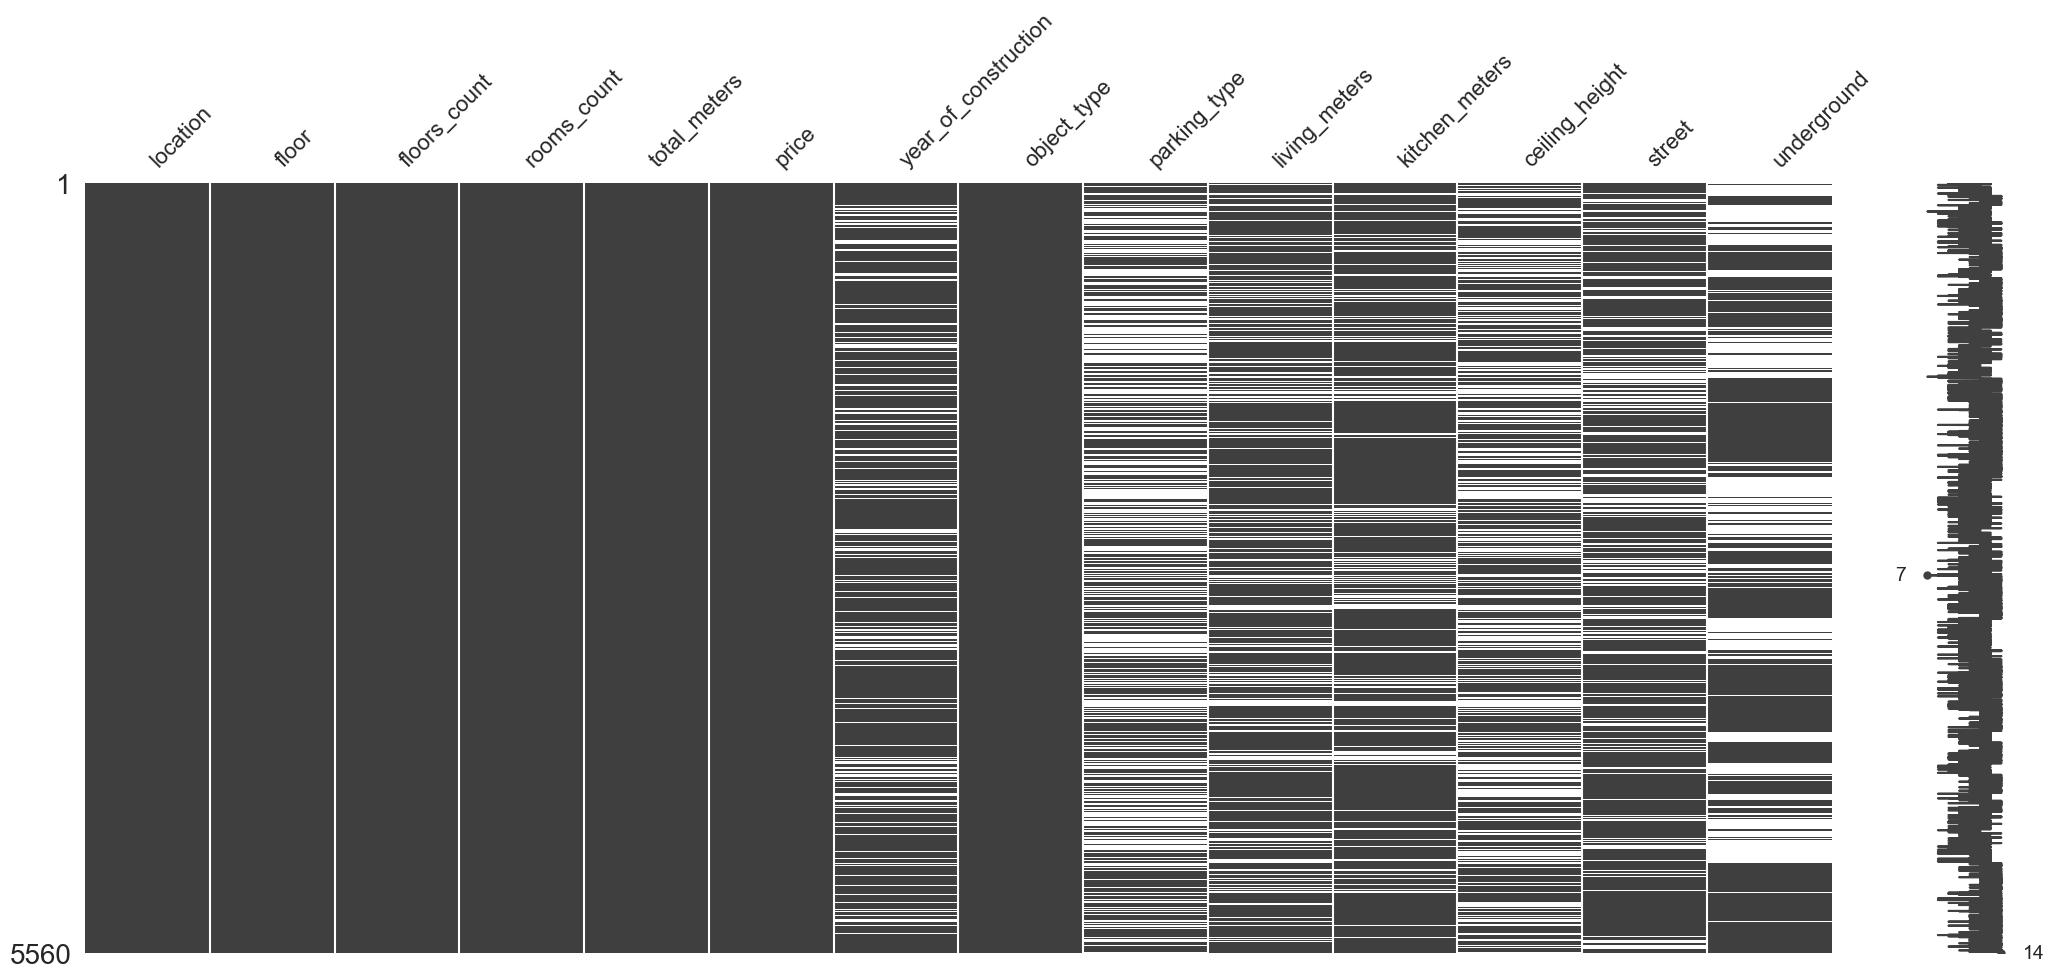

<Figure size 1000x500 with 0 Axes>

In [2872]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2873]:
df_clean['year_of_construction'].unique()

array(['1917', '1975', '1968', '2009', nan, '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', '1992',
       '2011', '1986', '1994', '1956', '1966', '1973', '1971', '1957',
       '2013', '1981', '1972', '1959', '2004', '1962', '2019', '1978',
       '1977', '2003', '1963', '1952', '2024', '1995', '1976', '1993',
       '2026', '1953', '2021', '2023', '1991', '2027', '2018', '2012',
       '2007', '1987', '2006', '1988', '1974', 'Напишите автору', '1979',
       '2022', '1929', '2017', '1989', '1985', '1930', '2020', '2016',
       '2005', '1958', '2014', '1982', '1996', '1967', '1948', '1961',
       '1940', '1938', '2008', '1997', '2002', '1999', '1983', '1998',
       '2000', '1954', '2001', '1960', '2028', '1955', '1900',
       'Позвоните автору', '1949', '1947', '1600', '1951', '1936', '1931',
       '1950', '1934', '1928', '1945', '1937', '1927', '1896', '2031'],
      dtype=object)

In [2874]:

df_clean = df_clean[df_clean['year_of_construction'] != -1]
df_clean['year_of_construction'] = df_clean['year_of_construction'].replace({
    '-1': np.nan,
    'year_of_construction': np.nan, 
    'Аукцион': np.nan, 
    'Напишите автору': np.nan, 
    'Позвоните автору': np.nan
})
df_clean['year_of_construction'] = df_clean['year_of_construction'].astype(float)

mean_value = df_clean['year_of_construction'].mean()

df_clean['year_of_construction'] = df_clean['year_of_construction'].fillna(mean_value)

df_clean['year_of_construction'] = df_clean['year_of_construction'].astype('int64')

df_clean['year_of_construction'].unique()

array([1917, 1975, 1968, 2009, 2003, 1969, 1980, 1990, 1964, 2025, 2015,
       1970, 1984, 1965, 2010, 1992, 2011, 1986, 1994, 1956, 1966, 1973,
       1971, 1957, 2013, 1981, 1972, 1959, 2004, 1962, 2019, 1978, 1977,
       1963, 1952, 2024, 1995, 1976, 1993, 2026, 1953, 2021, 2023, 1991,
       2027, 2018, 2012, 2007, 1987, 2006, 1988, 1974, 1979, 2022, 1929,
       2017, 1989, 1985, 1930, 2020, 2016, 2005, 1958, 2014, 1982, 1996,
       1967, 1948, 1961, 1940, 1938, 2008, 1997, 2002, 1999, 1983, 1998,
       2000, 1954, 2001, 1960, 2028, 1955, 1900, 1949, 1947, 1600, 1951,
       1936, 1931, 1950, 1934, 1928, 1945, 1937, 1927, 1896, 2031])

In [2875]:
df_clean = df_clean[(df_clean['year_of_construction'] >= 1987) & (df_clean['year_of_construction'] <= 2024)]

In [2876]:
df_clean['year_of_construction'].unique()

array([2009, 2003, 1990, 2015, 2010, 1992, 2011, 1994, 2013, 2004, 2019,
       2024, 1995, 1993, 2021, 2023, 1991, 2018, 2012, 2007, 1987, 2006,
       1988, 2022, 2017, 1989, 2020, 2016, 2005, 2014, 1996, 2008, 1997,
       2002, 1999, 1998, 2000, 2001])

In [2877]:
average_prices = df_clean.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

,year_of_construction,price
0,1987,8.025341e+06
1,1988,6.600242e+06
2,1989,8.150069e+06
3,1990,6.253625e+06
4,1991,6.803267e+06
5,1992,7.854167e+06
6,1993,7.817188e+06
7,1994,7.809606e+06
8,1995,8.537588e+06
9,1996,7.943125e+06


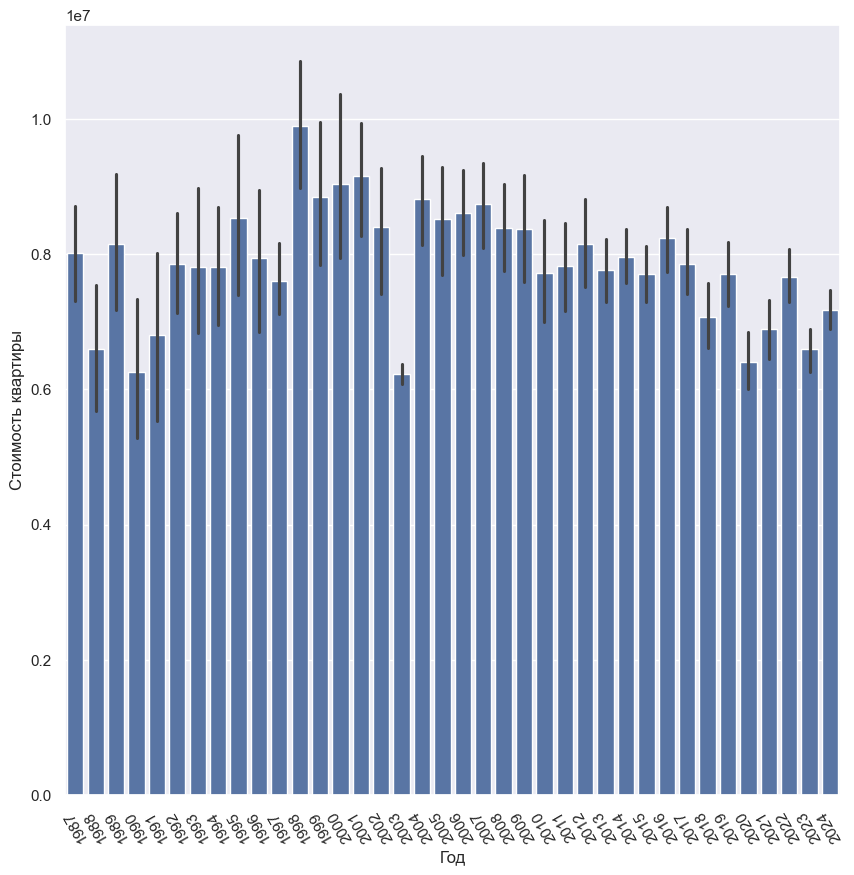

In [2878]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.barplot(x='year_of_construction', y='price', data=df_clean)
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

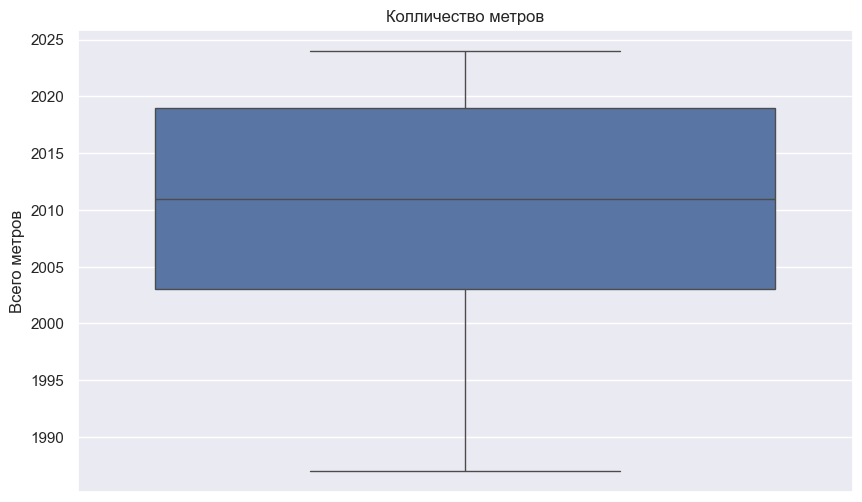

In [2879]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='year_of_construction', data=df_clean)

# Настройка графика
plt.title("Колличество метров")
plt.ylabel("Всего метров")


plt.show()

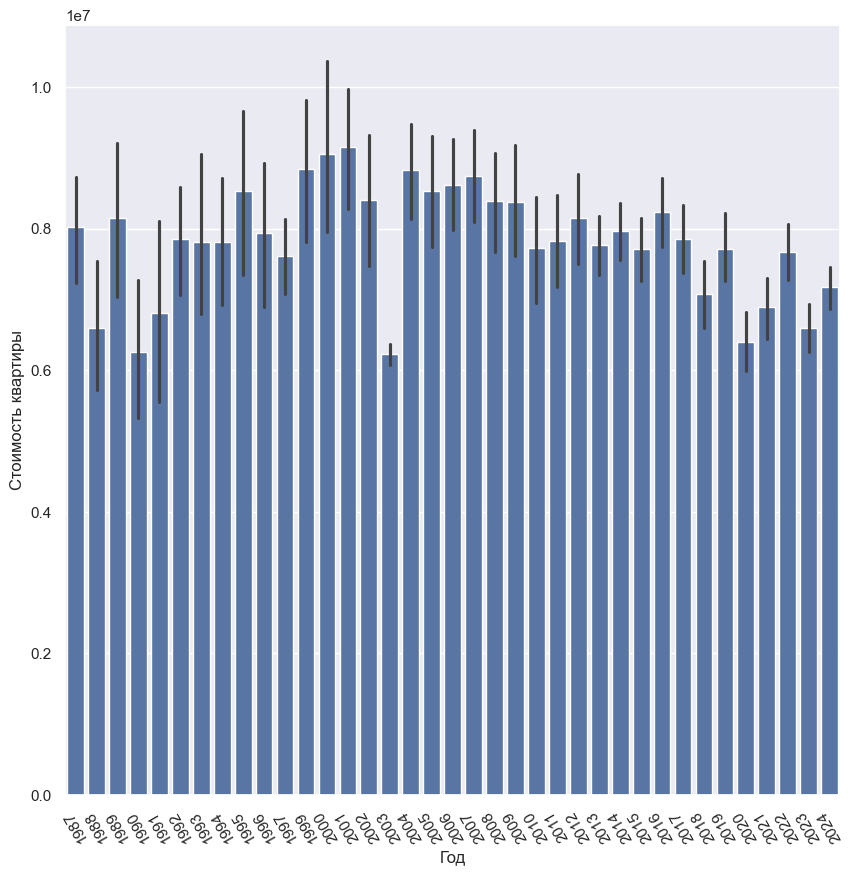

In [2880]:
df_clean = df_clean[df_clean['year_of_construction'] != 1998]

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.barplot(x='year_of_construction', y='price', data=df_clean)
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

In [2881]:
label_encoder = LabelEncoder()

df_clean['location'] = label_encoder.fit_transform(df_clean['location'])
df_clean['location'] = label_encoder.fit_transform(df_clean['location']).astype("int64")
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground'])
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground']).astype("int64")
df_clean['street'] = label_encoder.fit_transform(df_clean['street'])
df_clean['street'] = label_encoder.fit_transform(df_clean['street']).astype("int64")

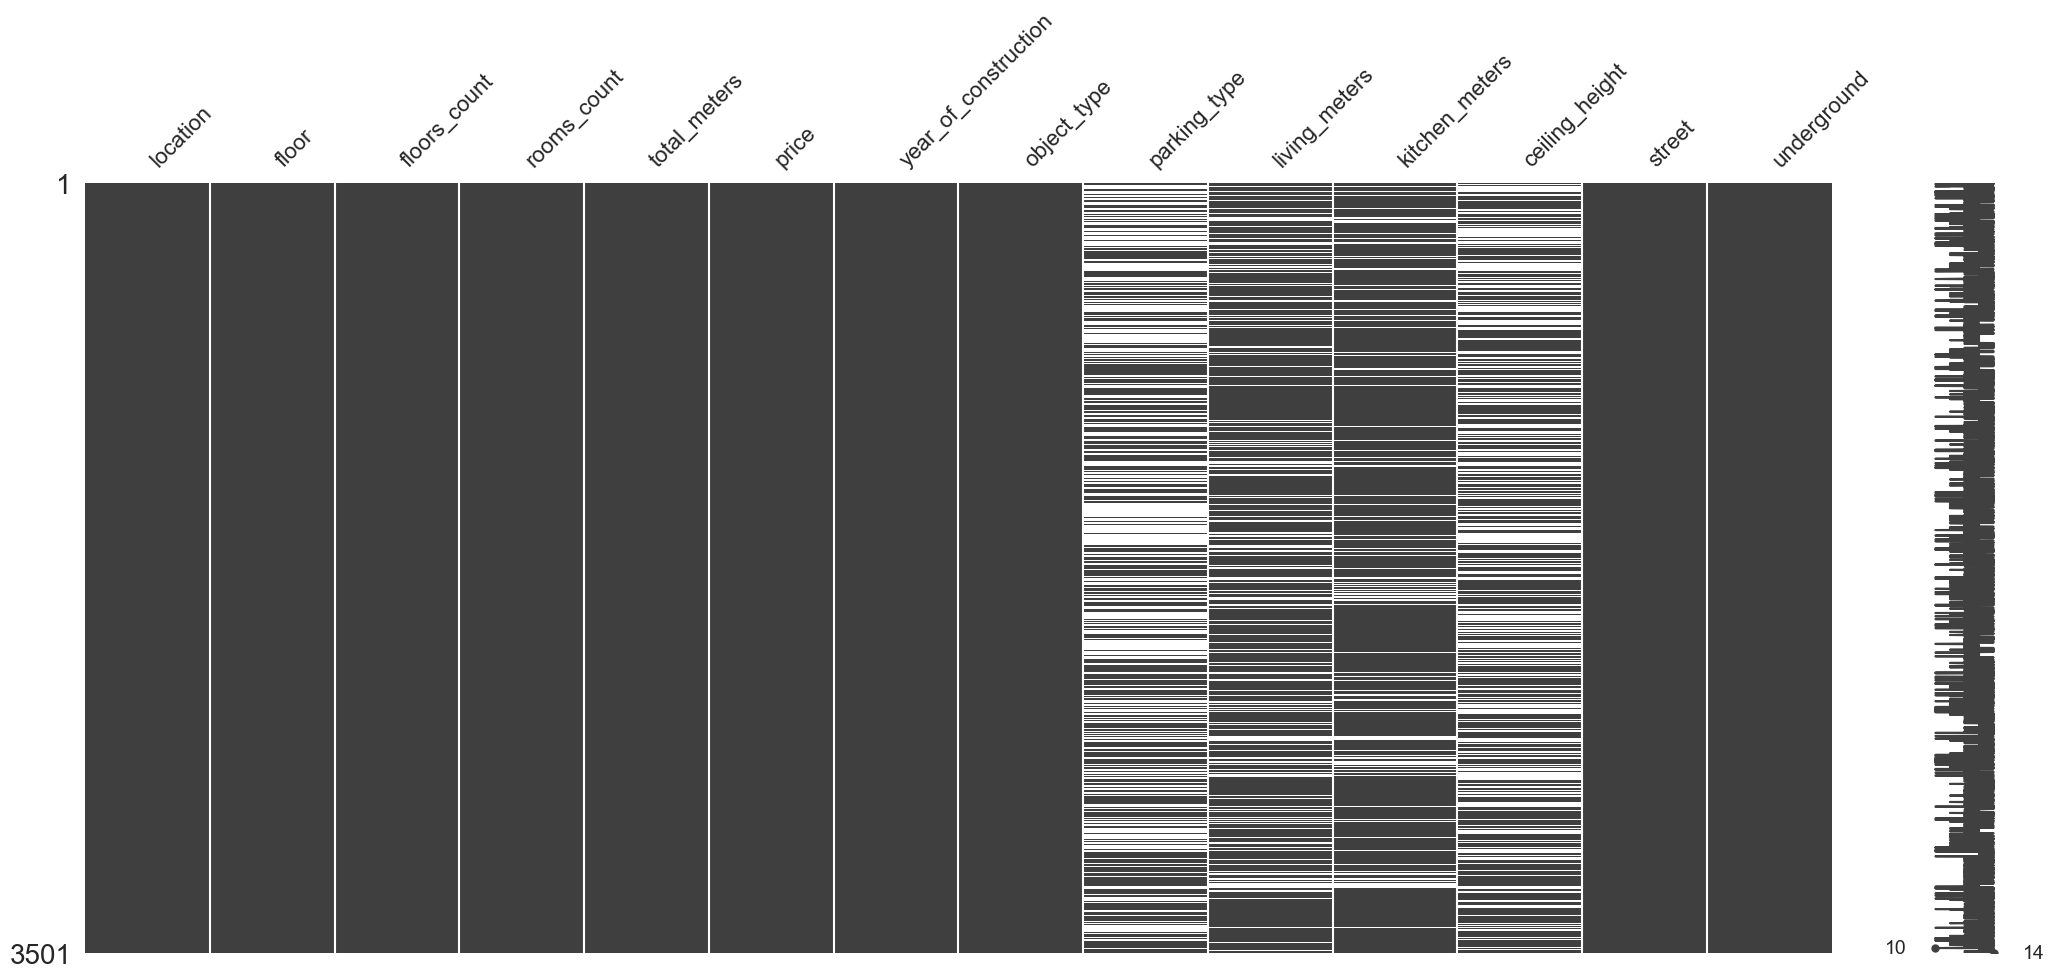

<Figure size 1000x500 with 0 Axes>

In [2882]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2883]:
# Заменяем 'м²', '\xa0' и '-1' на NaN в living_meters
df_clean['living_meters'] = (
    df_clean['living_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['living_meters'] = pd.to_numeric(df_clean['living_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу, игнорируя NaN
mean_value_living = df_clean['living_meters'].mean()

# Заполняем NaN средним значением
df_clean['living_meters'].fillna(mean_value_living, inplace=True)

# Переводим столбец в целочисленный формат
df_clean['living_meters'] = df_clean['living_meters'].astype('int64')

print(df_clean['living_meters'].head(10))


4     20
5     25
10    25
13    25
14    25
15    25
16    28
21    28
22    19
23    16
Name: living_meters, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\4084394780.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['living_meters'].fillna(mean_value_living, inplace=True)


In [2884]:
# Заменяем 'м²', '\xa0' и '-1' на NaN
df_clean['kitchen_meters'] = (
    df_clean['kitchen_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['kitchen_meters'] = pd.to_numeric(df_clean['kitchen_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу kitchen_meters, игнорируя NaN
mean_value = df_clean['kitchen_meters'].mean()

# Заполняем NaN средним значением
df_clean['kitchen_meters'].fillna(mean_value, inplace=True)

df_clean['kitchen_meters'] = df_clean['kitchen_meters'].astype('int64')

print(df_clean['kitchen_meters'].head(10))


4      5
5      6
10     6
13     9
14     9
15     9
16     6
21     6
22     3
23    10
Name: kitchen_meters, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\4195052956.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['kitchen_meters'].fillna(mean_value, inplace=True)


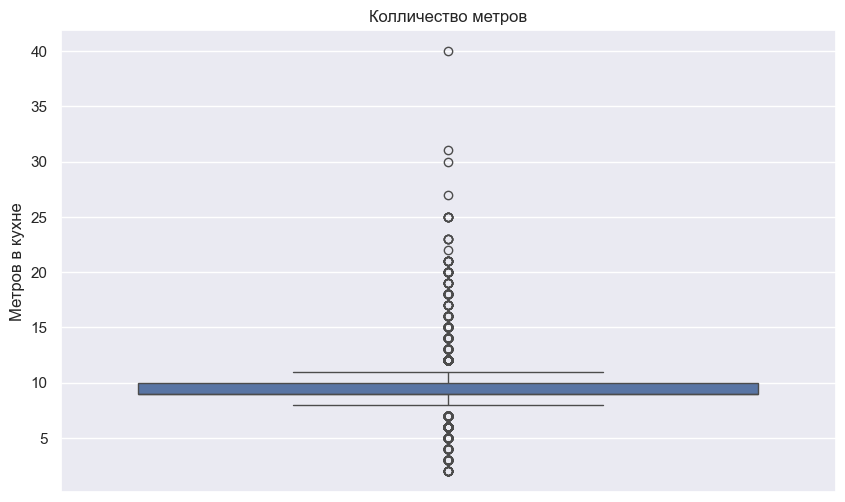

In [2885]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='kitchen_meters', data=df_clean)

# Настройка графика
plt.title("Колличество метров")
plt.ylabel("Метров в кухне")


plt.show()

In [2886]:
Q1 = df_clean['kitchen_meters'].quantile(0.25)
Q3 = df_clean['kitchen_meters'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Оставляем данные без выбросов
df_clean = df_clean[(df_clean['kitchen_meters'] >= lower_bound) & (df_clean['kitchen_meters'] <= upper_bound)]

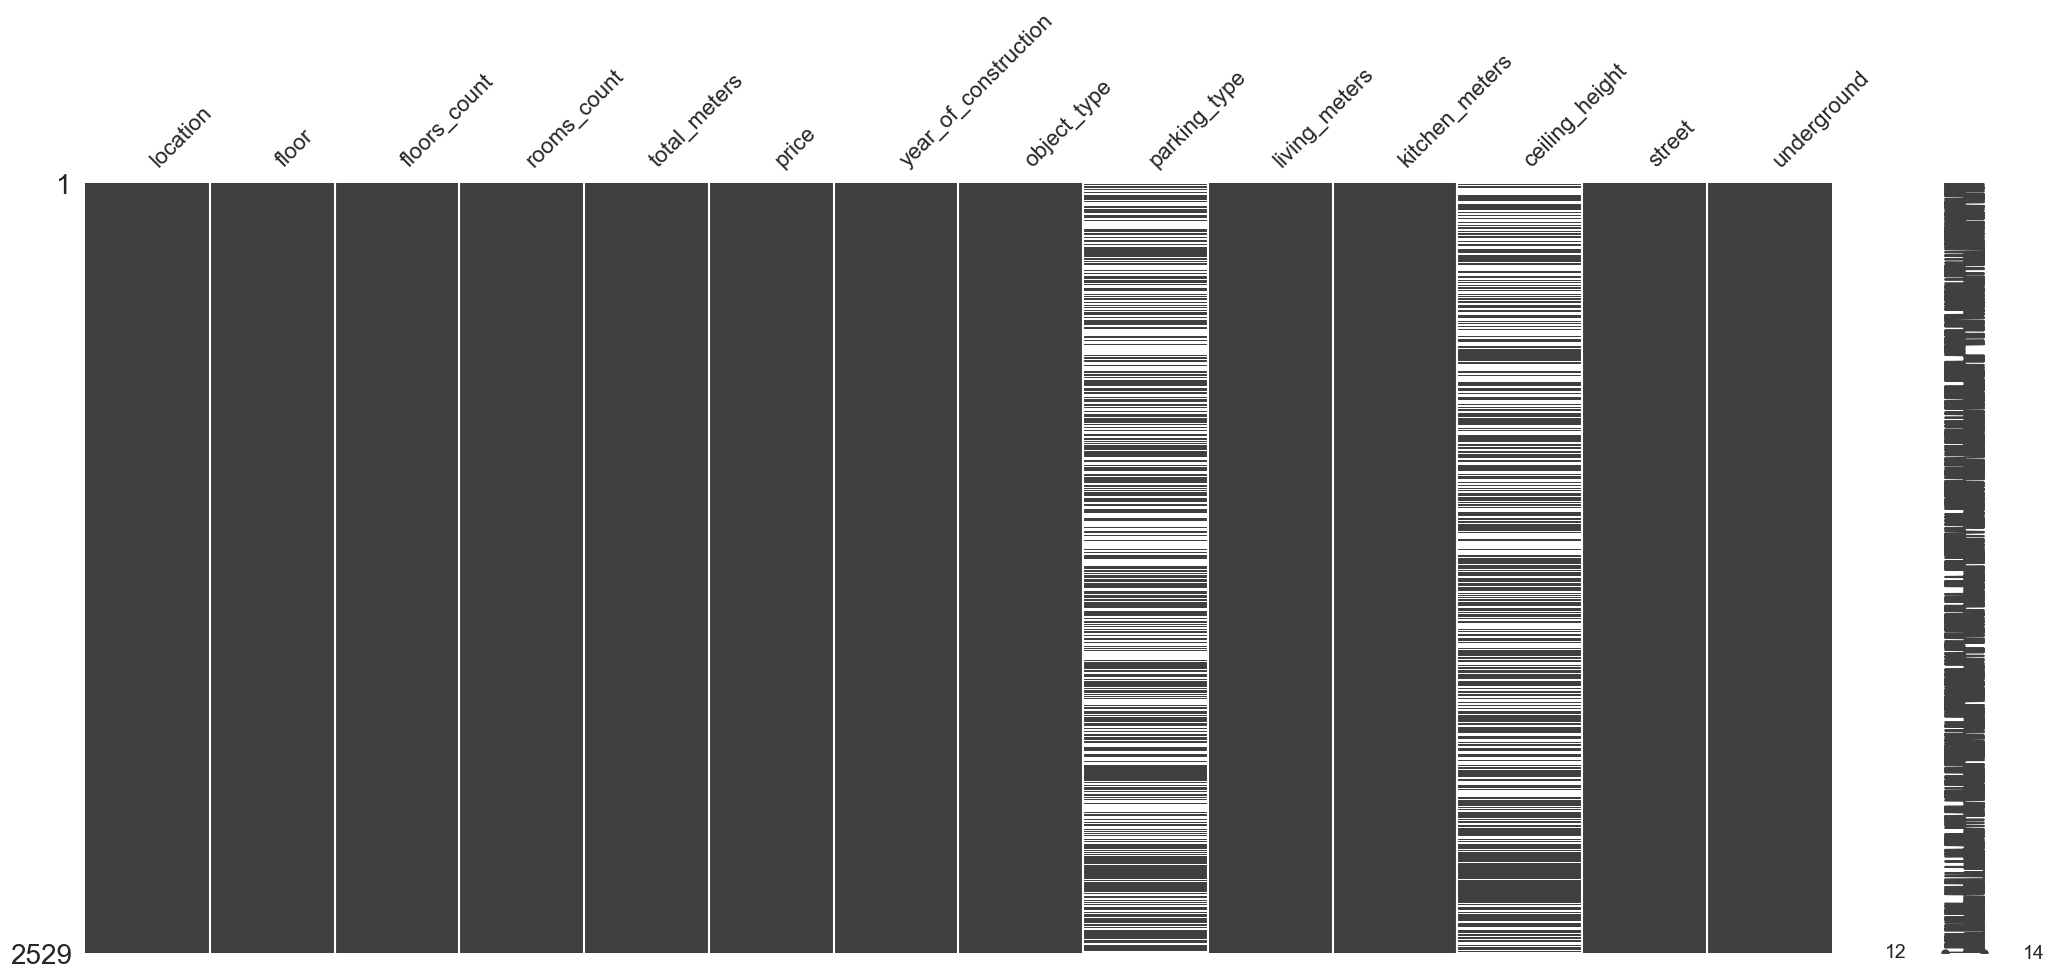

<Figure size 1000x500 with 0 Axes>

In [2887]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2888]:
df_clean['object_type'].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус'], dtype=object)

In [2889]:
label_encoder = LabelEncoder()

df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type'])
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type']).astype("int64")
df_clean['parking_type'] = label_encoder.fit_transform(df_clean['parking_type'])
df_clean['parking_type'] = label_encoder.fit_transform(df_clean['parking_type']).astype("int64")


In [2890]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 13 to 8390
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              2529 non-null   int64  
 1   floor                 2529 non-null   int64  
 2   floors_count          2529 non-null   int64  
 3   rooms_count           2529 non-null   int64  
 4   total_meters          2529 non-null   float64
 5   price                 2529 non-null   int64  
 6   year_of_construction  2529 non-null   int64  
 7   object_type           2529 non-null   int64  
 8   parking_type          2529 non-null   int64  
 9   living_meters         2529 non-null   int64  
 10  kitchen_meters        2529 non-null   int64  
 11  ceiling_height        1501 non-null   object 
 12  street                2529 non-null   int64  
 13  underground           2529 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 296.4+ KB


In [2891]:
df_clean['parking_type'].unique()

array([4, 1, 3, 2, 0])

In [2892]:
is_null = df_clean['parking_type'].isnull().sum()
is_null 

np.int64(0)

In [2893]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 13 to 8390
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              2529 non-null   int64  
 1   floor                 2529 non-null   int64  
 2   floors_count          2529 non-null   int64  
 3   rooms_count           2529 non-null   int64  
 4   total_meters          2529 non-null   float64
 5   price                 2529 non-null   int64  
 6   year_of_construction  2529 non-null   int64  
 7   object_type           2529 non-null   int64  
 8   parking_type          2529 non-null   int64  
 9   living_meters         2529 non-null   int64  
 10  kitchen_meters        2529 non-null   int64  
 11  ceiling_height        1501 non-null   object 
 12  street                2529 non-null   int64  
 13  underground           2529 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 296.4+ KB


In [2894]:
df_clean['ceiling_height'].unique()

array(['2,8\xa0м', nan, '2,7\xa0м', '3\xa0м', '2,5\xa0м', '2,73\xa0м',
       '2,64\xa0м', '3,1\xa0м', '2,72\xa0м', '3,09\xa0м', '2,6\xa0м',
       '2,75\xa0м', '2,55\xa0м', '2,67\xa0м', '2,84\xa0м', '2,68\xa0м',
       '2,66\xa0м', '2,65\xa0м', '2,9\xa0м', '3,15\xa0м', '6\xa0м',
       '2,74\xa0м', '2,57\xa0м', '2\xa0м', '2,52\xa0м', '2,54\xa0м',
       '2,85\xa0м', '2,77\xa0м', '2,78\xa0м', '4,4\xa0м', '2,95\xa0м',
       '2,48\xa0м', '2,3\xa0м', '2,82\xa0м', '2,56\xa0м', '3,2\xa0м',
       '1,65\xa0м', '4\xa0м', '2,87\xa0м', '2,71\xa0м', '2,99\xa0м',
       '3,36\xa0м', '2,76\xa0м', '3,3\xa0м', '3,04\xa0м', '2,62\xa0м',
       '25\xa0м', '3,35\xa0м', '9\xa0м', '3,6\xa0м', '3,7\xa0м',
       '3,12\xa0м', '3,4\xa0м', '2,51\xa0м', '4,5\xa0м', '2,61\xa0м',
       '3,26\xa0м', '2,81\xa0м'], dtype=object)

In [2895]:
# Удаление лишних символов и пробелов
df_clean['ceiling_height'] = (
    df_clean['ceiling_height']
    .str.strip()  # Убираем пробелы с краев
    .replace({'\xa0м': '', '-1': np.nan, 'ceiling_height': np.nan}, regex=True)
)

# Преобразование к числовому формату с заменой на NaN в случае ошибок
df_clean['ceiling_height'] = pd.to_numeric(df_clean['ceiling_height'], errors='coerce')

# Заполнение NaN средним значением
mean_value = df_clean['ceiling_height'].mean()
df_clean['ceiling_height'].fillna(mean_value, inplace=True)

# Преобразование к int
df_clean['ceiling_height'] = df_clean['ceiling_height'].astype("int64")

print(df_clean['ceiling_height'].head(10))

13    3
14    3
15    3
23    3
26    3
28    3
29    3
32    3
35    3
42    3
Name: ceiling_height, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_6132\1493766457.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['ceiling_height'].fillna(mean_value, inplace=True)


In [2896]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 13 to 8390
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              2529 non-null   int64  
 1   floor                 2529 non-null   int64  
 2   floors_count          2529 non-null   int64  
 3   rooms_count           2529 non-null   int64  
 4   total_meters          2529 non-null   float64
 5   price                 2529 non-null   int64  
 6   year_of_construction  2529 non-null   int64  
 7   object_type           2529 non-null   int64  
 8   parking_type          2529 non-null   int64  
 9   living_meters         2529 non-null   int64  
 10  kitchen_meters        2529 non-null   int64  
 11  ceiling_height        2529 non-null   int64  
 12  street                2529 non-null   int64  
 13  underground           2529 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 296.4 KB


In [2897]:
df_clean['price_per_one'] = df_clean['price']/df_clean['total_meters']
df_clean.head(10)
df_clean['price_per_one'].astype('int64')

# df['location'].value_counts()

13       98814
14       77500
15      116071
23       71979
26      116406
         ...  
8381    163132
8383    179245
8384    188697
8387    163558
8390    188235
Name: price_per_one, Length: 2529, dtype: int64

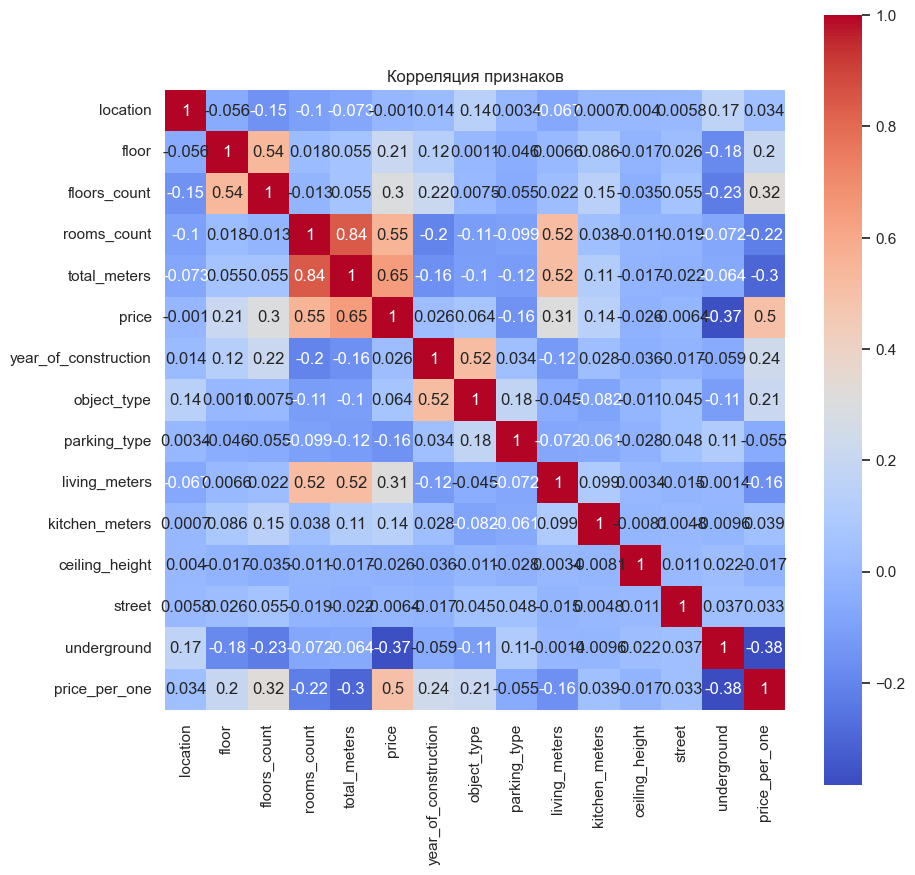

In [2898]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df_clean.corr(), square=True, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

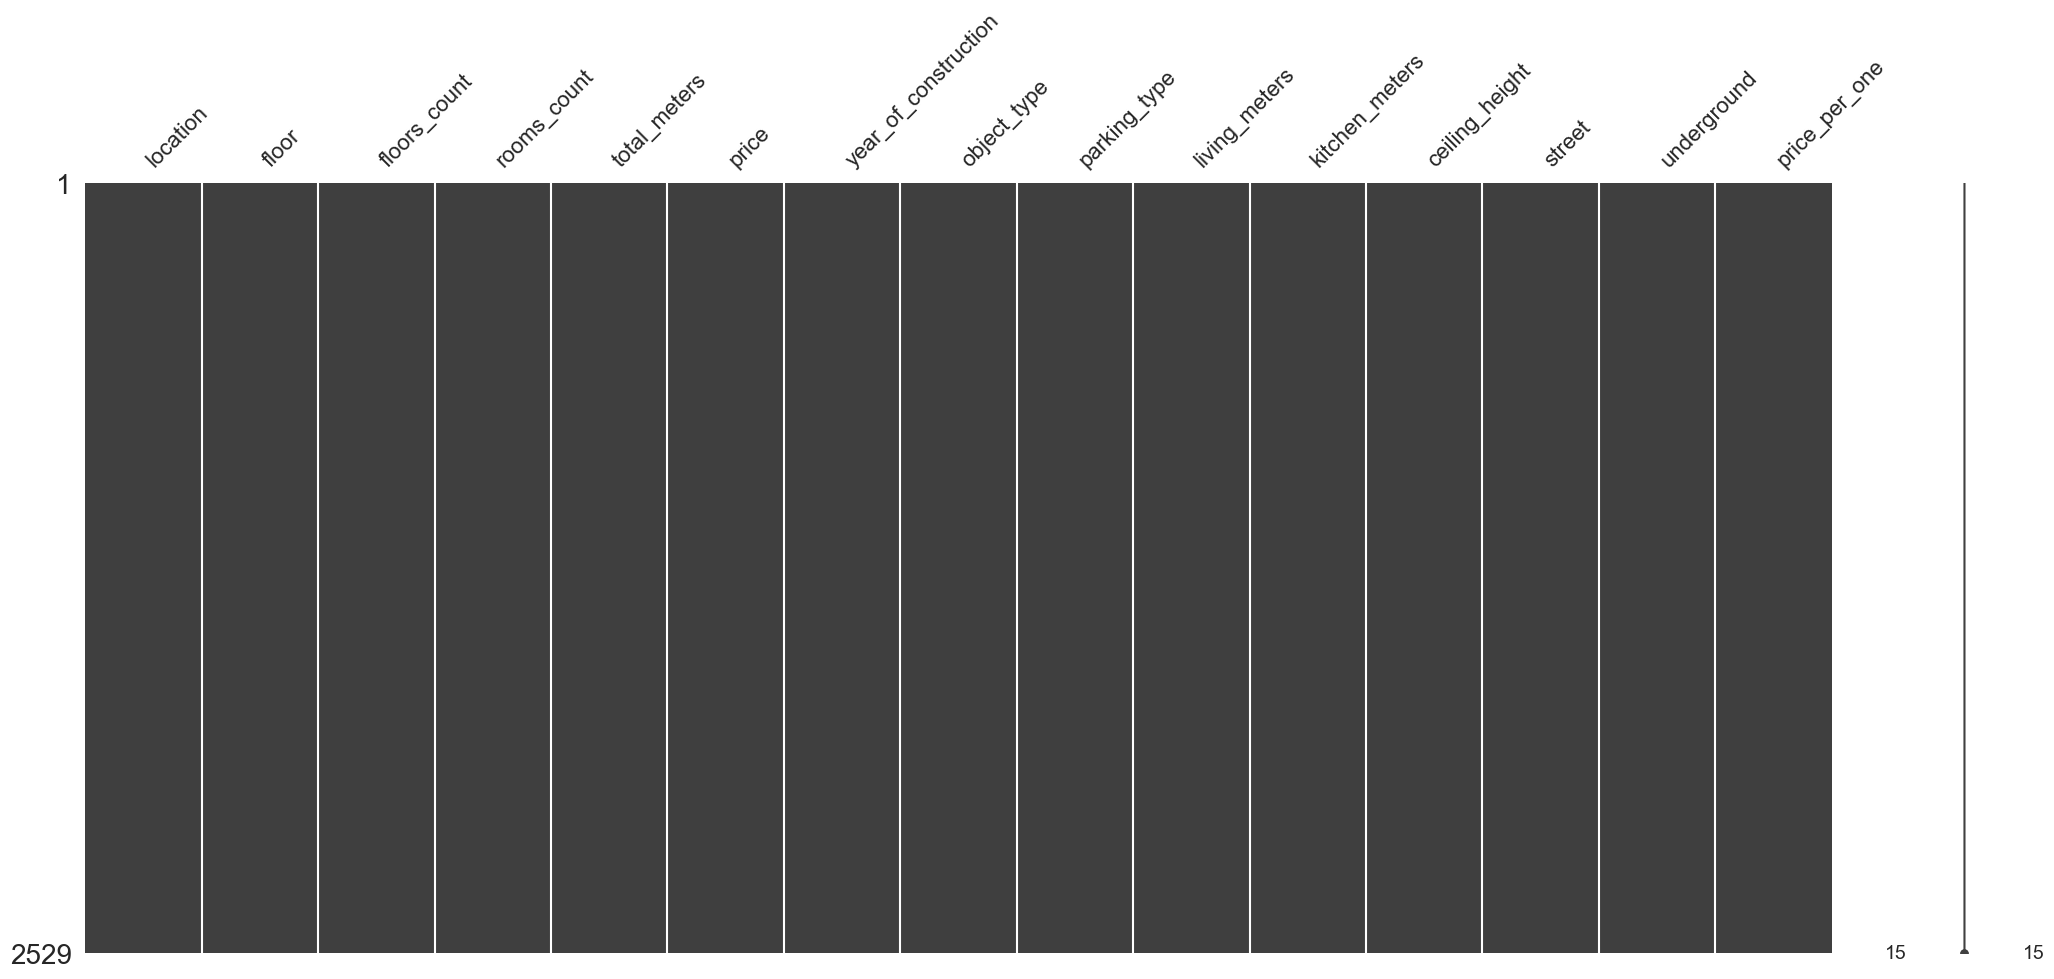

<Figure size 1000x500 with 0 Axes>

In [2899]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2904]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 13 to 8390
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              2529 non-null   int64  
 1   floor                 2529 non-null   int64  
 2   floors_count          2529 non-null   int64  
 3   rooms_count           2529 non-null   int64  
 4   total_meters          2529 non-null   float64
 5   price                 2529 non-null   int64  
 6   year_of_construction  2529 non-null   int64  
 7   object_type           2529 non-null   int64  
 8   parking_type          2529 non-null   int64  
 9   living_meters         2529 non-null   int64  
 10  kitchen_meters        2529 non-null   int64  
 11  ceiling_height        2529 non-null   int64  
 12  street                2529 non-null   int64  
 13  underground           2529 non-null   int64  
 14  price_per_one         2529 non-null   float64
dtypes: float64(2), int64(13)


In [2901]:
# df_clean.to_excel("filtered_data.xlsx", index=False)